SMS Spam Classification using EDA & Machine Learning

Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Import Libraries

In [2]:
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import string

Load Dataset

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv", sep='\t')
df.columns = ['label', 'message']
print(" Dataset Loaded Successfully!")
print(df.head())


 Dataset Loaded Successfully!
  label                                            message
0   ham                      Ok lar... Joking wif u oni...
1  spam  Free entry in 2 a wkly comp to win FA Cup fina...
2   ham  U dun say so early hor... U c already then say...
3   ham  Nah I don't think he goes to usf, he lives aro...
4  spam  FreeMsg Hey there darling it's been 3 week's n...


Basic Info & Null Check

In [7]:
print("\nDataset Info:")
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5571 entries, 0 to 5570
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5571 non-null   object
 1   message  5571 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None

Missing Values:
 label      0
message    0
dtype: int64


EDA (EXPLORATOTY DATA ANALYSIS)

/tmp/ipython-input-787216932.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='cool')


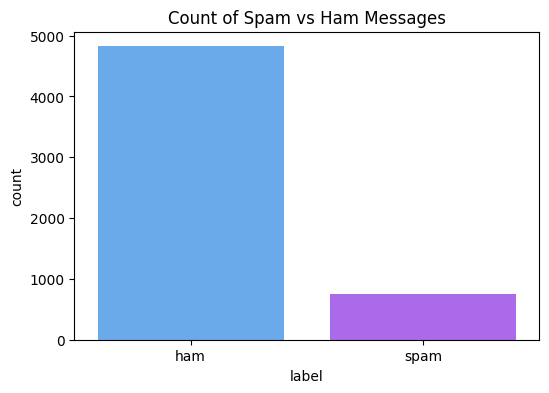

In [9]:
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=df, palette='cool')
plt.title("Count of Spam vs Ham Messages")
plt.show()


Message length features

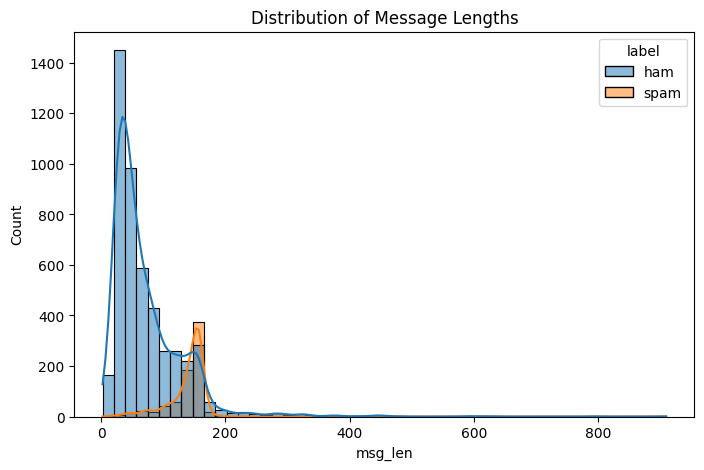

In [10]:
df['msg_len'] = df['message'].apply(len)

plt.figure(figsize=(8,5))
sns.histplot(data=df, x='msg_len', hue='label', bins=50, kde=True)
plt.title("Distribution of Message Lengths")
plt.show()

WordCloud for Spam & Ham

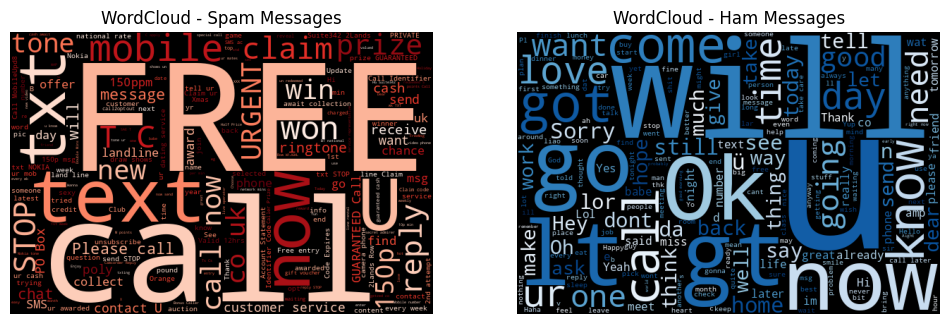

In [11]:
spam_text = " ".join(df[df['label']=='spam']['message'])
ham_text = " ".join(df[df['label']=='ham']['message'])

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("WordCloud - Spam Messages")
plt.imshow(WordCloud(width=600, height=400, background_color='black', colormap='Reds').generate(spam_text))
plt.axis('off')

plt.subplot(1,2,2)
plt.title("WordCloud - Ham Messages")
plt.imshow(WordCloud(width=600, height=400, background_color='black', colormap='Blues').generate(ham_text))
plt.axis('off')
plt.show()


Text Cleaning

In [12]:
import re
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.strip()
    return text

df['clean_msg'] = df['message'].apply(clean_text)

Encode Lables

In [13]:
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})

split data

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df['clean_msg'], df['label_num'], test_size=0.2, random_state=42)


TF-TDF Vectorization

In [15]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=3000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


 Train Models

In [16]:
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)

dt.fit(X_train_vec, y_train)
rf.fit(X_train_vec, y_train)

y_pred_dt = dt.predict(X_test_vec)
y_pred_rf = rf.predict(X_test_vec)

Evaluate Models

In [17]:
print("\n Decision Tree Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

print("\n Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))



 Decision Tree Results:
Accuracy: 0.95695067264574
[[931  24]
 [ 24 136]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       955
           1       0.85      0.85      0.85       160

    accuracy                           0.96      1115
   macro avg       0.91      0.91      0.91      1115
weighted avg       0.96      0.96      0.96      1115


 Random Forest Results:
Accuracy: 0.979372197309417
[[955   0]
 [ 23 137]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       955
           1       1.00      0.86      0.92       160

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115



Test on Custom Input

In [18]:
sample = ["Congratulations! You've won a $500 gift card. Call now!",
          "Hey , let's meet for project discussion tomorrow."]
sample_vec = vectorizer.transform(sample)
predictions = rf.predict(sample_vec)

print("\n Custom Predictions:")
for msg, pred in zip(sample, predictions):
    print(f"Message: {msg}\nPrediction: {'Spam' if pred==1 else 'Ham'}\n")


 Custom Predictions:
Message: Congratulations! You've won a $500 gift card. Call now!
Prediction: Spam

Message: Hey , let's meet for project discussion tomorrow.
Prediction: Ham

